# Les images vectorielles
Les images vectorielles s’appuient sur une description mathématique des images, et leur représentation se fait au moment de la visualisation pour être adaptée au mieux à l’outil de représentation (device) (la plupart du temps un écran, mais ça peut aussi être une imprimante, alors appelée traceuse). Les images vectorielles sont donc à favoriser pour les images synthétiques.
Le passage des formules mathématiques à une image adaptée au support final s’appelle le rendu (rendering). La durée du rendu peut être un obstacle à l’utilisation d’images vectorielles mais les cas simples sont calculées très rapidement.
Attention : ce qu’on appelle les images de synthèse sont fabriquées selon des formules mathématiques aussi, mais sont souvent fabriquées à l’avance. En effet, les méthodes de calcul de luminosité, de diffusion et de réfraction de la lumière dans des matériaux (semi-)transparents ou réfléchissants (verre, miroirs, nuages) entraînent des temps de calcul très longs.
Nous étudierons dans le cadre de ce cours uniquement les images 2D qui utiliseront essentiellement un seul format de description : le format SVG. Pour la partie expérimentale, nous utiliserons `DrawSVG.py`.


In [1]:
# Solution
from IPython.display import display, HTML
toggle_code_str = '''
<p>
<input type="button" onclick="javascript:code_toggle(forceHide=false)" class="showbutton" value="Montrer les solutions" />
<input type="button" onclick="javascript:code_toggle(forceHide=true)" class="hidebutton" value="Cacher les solutions" />
</p>
'''

toggle_code_prepare_str = '''
    <script>
function slide_down(container) {
    container.style.transition="height .5s ease";
    container.style.overflow="hidden";
    container.style.display="block";
    container.style.height = "auto"
    var height = container.clientHeight + "px"
    container.style.height = "0px"
    setTimeout(() => {
        container.style.height = height
    }, 0) 
}
function slide_up(container) {
    container.style.transition="height .5s ease";
    container.style.overflow="hidden";
    container.style.display="block";
    setTimeout(() => {
        container.style.height = "0px"
    }, 0) 
    container.addEventListener('transitionend', () => {
        container.style.display="none";
    }, {once: true})
}

function code_toggle(forceHide=false) {
    const cells = document.querySelectorAll('div.jp-Cell.jp-CodeCell div.jp-InputArea');

    cells.forEach(function(cell) {
        const firstLine = cell.textContent;
        const regex = /# *Solution/;
        if (regex.test(firstLine)) {        
            if (forceHide) {
                slide_up(cell);
            } else {
                slide_down(cell);
            }
        }      
    });
    const sbuttons = document.querySelectorAll('.showbutton');
    const hbuttons = document.querySelectorAll('.hidebutton');
    if (forceHide) {
        sbuttons.forEach(function(cell) {
            cell.style.display="inline"
        });
        hbuttons.forEach(function(cell) {
            cell.style.display="none"
        });
    } else {
        sbuttons.forEach(function(cell) {
            cell.style.display="none"
        });
        hbuttons.forEach(function(cell) {
            cell.style.display="inline"
        });
    }
}
code_toggle(forceHide=true)
    </script>
'''

display(HTML("Ce carnet Jupyter peut afficher ou cacher des solutions. Il est recommandé de les cacher pendant votre progression."))
display(HTML(toggle_code_prepare_str + toggle_code_str))

def toggle_button(text=None):
    if text is not None:
        display(HTML("<p>"+text+"</p>"))
    display(HTML(toggle_code_str))

In [1]:
!pip install drawsvg cairosvg

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


Dans un premier temps, nous allons essayer quelques elements basiques : rectangles, lignes, cercle.

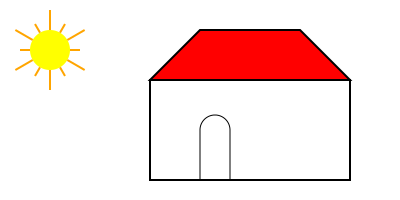

In [2]:
import drawsvg as draw
import math

# Dimensions de l'image
width, height = 400, 200

# Création de l'image SVG
d = draw.Drawing(width, height, origin=(0, 0))
# Dessiner la maison (un rectangle)

house_x,house_y = width-250,height-120
d.append(draw.Rectangle(house_x, house_y, 200, 100,stroke='black',stroke_width=2,fill='white'))
d.append(draw.Lines(house_x, house_y, house_x+50, house_y-50, house_x+150,house_y-50,house_x+200,
                    house_y,close=True,stroke='black',stroke_width=2,fill='red'))

d.append(draw.Line(width-170,height-20,width-170,height-70,stroke_width=1,stroke='black'))
d.append(draw.Arc(width-185,height-70,15,0,180,stroke_width=1,stroke='black',fill='transparent'))
d.append(draw.Line(width-200,height-70,width-200,height-20,stroke_width=1,stroke='black'))

# Dessiner le soleil (un cercle)
# Rayon du soleil
sun_radius = 20
ray_length = 20
sun_x,sun_y = sun_radius+1.5*ray_length, sun_radius+1.5*ray_length
d.append(draw.Circle(sun_x,sun_y, sun_radius, fill='yellow'))

# Ajouter quelques rayons de soleil
num_rays = 12
for i in range(num_rays):
    ray_length_i = ray_length*(1.5+(i%2)/2)
    angle = (360 / num_rays) * i
    angle_rad = math.radians(angle)  # Convertir l'angle en radians
    x_start = sun_x + sun_radius * math.cos(angle_rad)
    y_start = sun_y + sun_radius * math.sin(angle_rad)
    x_end = sun_x + ray_length_i * math.cos(angle_rad)
    y_end = sun_y + ray_length_i * math.sin(angle_rad)
    d.append(draw.Line(x_start,y_start, x_end, y_end, stroke='orange', stroke_width=2))


display(d)

In [4]:
print(d.as_html())

<!DOCTYPE html>
<head>
<meta charset="utf-8">
</head>
<body>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="400" height="200" viewBox="0 0 400 200">
<defs>
</defs>
<rect x="150" y="80" width="200" height="100" stroke="black" stroke-width="2" fill="white" />
<path d="M150,80 L200,30 L300,30 L350,80 Z" stroke="black" stroke-width="2" fill="red" />
<path d="M230,180 L230,130" stroke-width="1" stroke="black" />
<path d="M230.0,130.0 A15,15,0,1,0,200.0,130.0" stroke-width="1" stroke="black" fill="transparent" />
<path d="M200,130 L200,180" stroke-width="1" stroke="black" />
<circle cx="50.0" cy="50.0" r="20" fill="yellow" />
<path d="M70.0,50.0 L80.0,50.0" stroke="orange" stroke-width="2" />
<path d="M67.32050807568878,60.0 L84.64101615137756,70.0" stroke="orange" stroke-width="2" />
<path d="M60.0,67.32050807568876 L65.0,75.98076211353316" stroke="orange" stroke-width="2" />
<path d="M50.0,70.0 L50.0,90.0" stroke="orange" stroke-width="2" />


**Exercice :** reprendre le dessin ci-dessus, et faire que la moitié inférieure du dessin soit en vert clair, et la moitié supérieure en bleu ciel. Vous pouvez aussi rajouter d'autres éléments.

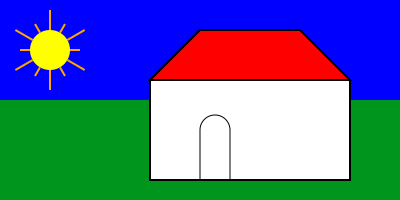

In [7]:
import drawsvg as draw
import math

# Dimensions de l'image
width, height = 400, 200

# Création de l'image SVG
d = draw.Drawing(width, height, origin=(0, 0))
# Dessiner la maison (un rectangle)

# dessin ciel bleu
d.append(draw.Rectangle(0,0,400, 100, fill="rgb(0,0,255)"))
#dessin herbe
d.append(draw.Rectangle(0,100,400, 100, fill="rgb(0,150,30)"))

house_x,house_y = width-250,height-120
d.append(draw.Rectangle(house_x, house_y, 200, 100,stroke='black',stroke_width=2,fill='white'))
d.append(draw.Lines(house_x, house_y, house_x+50, house_y-50, house_x+150,house_y-50,house_x+200,
                    house_y,close=True,stroke='black',stroke_width=2,fill='red'))

d.append(draw.Line(width-170,height-20,width-170,height-70,stroke_width=1,stroke='black'))
d.append(draw.Arc(width-185,height-70,15,0,180,stroke_width=1,stroke='black',fill='transparent'))
d.append(draw.Line(width-200,height-70,width-200,height-20,stroke_width=1,stroke='black'))

# Dessiner le soleil (un cercle)
# Rayon du soleil
sun_radius = 20
ray_length = 20
sun_x,sun_y = sun_radius+1.5*ray_length, sun_radius+1.5*ray_length
d.append(draw.Circle(sun_x,sun_y, sun_radius, fill='yellow'))

# Ajouter quelques rayons de soleil
num_rays = 12
for i in range(num_rays):
    ray_length_i = ray_length*(1.5+(i%2)/2)
    angle = (360 / num_rays) * i
    angle_rad = math.radians(angle)  # Convertir l'angle en radians
    x_start = sun_x + sun_radius * math.cos(angle_rad)
    y_start = sun_y + sun_radius * math.sin(angle_rad)
    x_end = sun_x + ray_length_i * math.cos(angle_rad)
    y_end = sun_y + ray_length_i * math.sin(angle_rad)
    d.append(draw.Line(x_start,y_start, x_end, y_end, stroke='orange', stroke_width=2))


display(d)

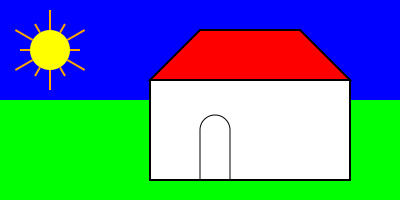

In [6]:
# Solution
toggle_button()
import drawsvg as draw
import math

# Dimensions de l'image
width, height = 400, 200

# Création de l'image SVG
d = draw.Drawing(width, height, origin=(0, 0))
# Dessiner la maison (un rectangle)

house_x,house_y = width-250,height-120
d.append(draw.Rectangle(0,100,400,200,fill='lime'))
d.append(draw.Rectangle(0,0,400,100,fill='rgb(0,0,255)'))
d.append(draw.Rectangle(house_x, house_y, 200, 100,stroke='black',stroke_width=2,fill='white'))
d.append(draw.Lines(house_x, house_y, house_x+50, house_y-50, house_x+150,house_y-50,house_x+200,
                    house_y,close=True,stroke='black',stroke_width=2,fill='red'))

d.append(draw.Line(width-170,height-20,width-170,height-70,stroke_width=1,stroke='black'))
d.append(draw.Arc(width-185,height-70,15,0,180,stroke_width=1,stroke='black',fill='transparent'))
d.append(draw.Line(width-200,height-70,width-200,height-20,stroke_width=1,stroke='black'))

# Dessiner le soleil (un cercle)
# Rayon du soleil
sun_radius = 20
ray_length = 20
sun_x,sun_y = sun_radius+1.5*ray_length, sun_radius+1.5*ray_length
d.append(draw.Circle(sun_x,sun_y, sun_radius, fill='yellow'))

# Ajouter quelques rayons de soleil
num_rays = 12
for i in range(num_rays):
    ray_length_i = ray_length*(1.5+(i%2)/2)
    angle = (360 / num_rays) * i
    angle_rad = math.radians(angle)  # Convertir l'angle en radians
    x_start = sun_x + sun_radius * math.cos(angle_rad)
    y_start = sun_y + sun_radius * math.sin(angle_rad)
    x_end = sun_x + ray_length_i * math.cos(angle_rad)
    y_end = sun_y + ray_length_i * math.sin(angle_rad)
    d.append(draw.Line(x_start,y_start, x_end, y_end, stroke='orange', stroke_width=2))

d.save_png('example.png')

display(d)


On va maintenant rajouter des chemins complexes. Un chemin est une suite d'éléments qui partent à chaque fois du dernier point et qui sont au choix :

  * un mouvement (si ce n'est pas le premier élément, le point de départ est (0,0)) (directive m/M)
  * une ligne (défini par (x,y)) (directive l/L, ou h/H et v/V pour des lignes horizontales et verticales)
  * un arc de cercle (drawsvg le fait précéder d'un mouvement (directive a/A)
  * des courbes de Bézier cubiques ou quadratiques.

Les courbes de Bézier cubiques (deux points de contrôle, un point d'arrivée) sont plus utilisées que les courbes de Bézier quadratiques (un seul point de contrôle et un point d'arrivée). Elles utilisent c/C. Les courbes de Bézier cubique qui ont le premier point de contrôle symétrique du premier utilisent s/S. Les courbes de Bézier quadratiques utilisent q/Q.

Les directives en majuscule utilisent des coordonnes absolues, les directives en minuscule utilisent des coordonnées relatives au dernier point (lorsqu'on donne plusieurs points dans la même, par exemple pour une courbe de Bézier, les 2 ou 3 coordonnées sont relatives au même point qui est le point d'arrivée de la directive précédente).

Par exemple : 

    M 0 0 l 10 0 c 20,10 25,-10 30,-10 donnera une courbe de Bézier d'abord horizontale, puis qui plonge vers le bas, remonte et arrive horizontalement en 40,10 (le 10,0 du l plus les 30,10 du c).



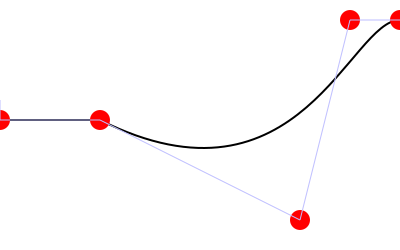

In [8]:
import drawsvg as draw

d = draw.Drawing(400,250, origin=(0,0))

p = draw.Path(stroke_width=2, stroke='black',fill='transparent')
p.m(0,120)
p.l(100,0)
p.c(200,100,250,-100,300,-100)
d.append(p)

j=(0,100)
for i in [(0,120),(100,120),(300,220),(350,20),(400,20)]:
    d.append(draw.Circle(i[0],i[1],10,fill='red'))
    d.append(draw.Line(j[0],j[1],i[0],i[1],stroke='#C0C0FF',stroke_width=1))
    j=i
display(d)

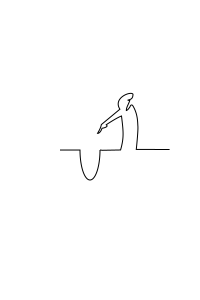

In [8]:
import drawsvg as draw

d = draw.Drawing(200,300, origin='center')

p = draw.Path(stroke_width=1, stroke='black',fill='transparent')
#96.106164,170.50395
p.m(0,0)
p.l(2.429383,0.28143)
p.l(18.152333,-0.30693)
p.c(3.49307,-12.37936,2.86094,-18.08889,0.91838,-33.97145)
p.c(-4.68294,1.70273,-15.30755,8.75733,-15.30755,8.75733)
p.c(0.46102,0.62149,1.01953,0.11307,0.67433,1.79185)
p.c(-1.3829,0.91509,-2.73356,1.43825,-4.855083,1.70044)
p.c(-0.86305,3.03193,-2.931763,5.37421,-4.477861,5.09727)
p.c(1.741505,-2.91355,3.234609,-5.63534,3.82074,-8.77076)
p.L(19.906576,-40.79305)
p.c(-7.27673,-11.33972,10.92349,-18.31349,13.06574,-15.01566)
p.c(0.0202,5.30202,-2.96965,5.23538,-5.35128,6.00817)
p.l(2.14871,0.33858)
p.c(-1.47967,4.30676,-3.44066,6.71017,-3.40504,9.97716)
p.c(1.0171,-0.2658,2.28548,-1.61054,3.68571,-3.8235)
p.c(0.80247,-2.51127,2.31847,-1.73468,2.77611,-0.94202)
p.c(5.13388,8.39004,4.77017,16.95265,5.06909,20.54731)
p.c(0.29892,3.59465,-0.9617,17.03329,-1.62619,23.13325)
p.l(33.30925,0.0662)
p.M(0,0)
p.a(10,30,0,False,True,-20,0) # p.arc est beaucoup plus facile à utiliser
p.l(-20,0)
d.append(p)
display(d)

Enfin on peut faire usage de groupes pour faire des transformations, ou réutiliser des éléments.

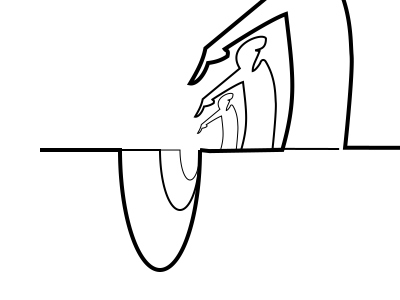

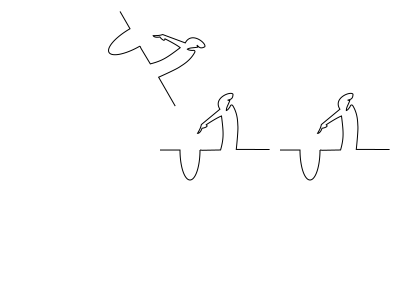

In [9]:
import drawsvg as draw

d = draw.Drawing(400,300, origin='center')
g = draw.Group(id='linea', fill='none')
p = draw.Path(stroke_width=1, stroke='black',fill='transparent')
#96.106164,170.50395
p.m(0,0)
p.l(2.429383,0.28143)
p.l(18.152333,-0.30693)
p.c(3.49307,-12.37936,2.86094,-18.08889,0.91838,-33.97145)
p.c(-4.68294,1.70273,-15.30755,8.75733,-15.30755,8.75733)
p.c(0.46102,0.62149,1.01953,0.11307,0.67433,1.79185)
p.c(-1.3829,0.91509,-2.73356,1.43825,-4.855083,1.70044)
p.c(-0.86305,3.03193,-2.931763,5.37421,-4.477861,5.09727)
p.c(1.741505,-2.91355,3.234609,-5.63534,3.82074,-8.77076)
p.L(19.906576,-40.79305)
p.c(-7.27673,-11.33972,10.92349,-18.31349,13.06574,-15.01566)
p.c(0.0202,5.30202,-2.96965,5.23538,-5.35128,6.00817)
p.l(2.14871,0.33858)
p.c(-1.47967,4.30676,-3.44066,6.71017,-3.40504,9.97716)
p.c(1.0171,-0.2658,2.28548,-1.61054,3.68571,-3.8235)
p.c(0.80247,-2.51127,2.31847,-1.73468,2.77611,-0.94202)
p.c(5.13388,8.39004,4.77017,16.95265,5.06909,20.54731)
p.c(0.29892,3.59465,-0.9617,17.03329,-1.62619,23.13325)
p.l(33.30925,0.0662)
p.M(0,0)
p.a(10,30,0,False,True,-20,0) # p.arc est beaucoup plus facile à utiliser
p.l(-20,0)
g.append(p)

d.append(g)
d.append(draw.Use("linea",0,0,transform="scale(2,2)"))
d.append(draw.Use("linea",0,0,transform="scale(4,4)"))
display(d)
dd = draw.Drawing(400,300, origin='center')
dd.append(g)
dd.append(draw.Use("linea",120,0))
dd.append(draw.Use("linea",-120,0,transform="rotate(60)")) # Attention, la rotation est par rapport à l'origine
display(dd)

Et enfin on peut utiliser quelques éléments supplémentaires, comme du texte ou des flèches (exemple tiré de la documentation de drawsvg)

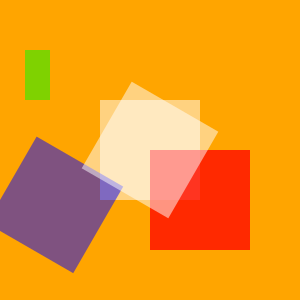

In [10]:
import drawsvg as draw

d = draw.Drawing(300,300, origin=(0,0))
d.append(draw.Rectangle(0, 0, 300,300, fill='orange'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(255,255,255,.5)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(255,0,0,.5)',transform='translate(50,50)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(255,0,0,.5)',transform='translate(50,50)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(0,255,0,.5)',transform='scale(.25,0.5)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(0,0,255,.5)',transform='rotate(30)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(255,255,255,.5)',transform_origin="150 150",transform='rotate(30)'))
display(d)
d.save_png('transforms.png')


**Exercice :** Reproduire le dessin donné en solution ci-dessous

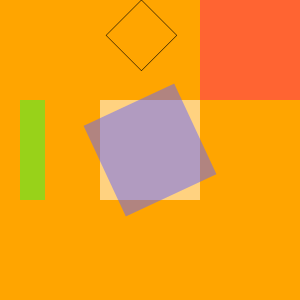

In [58]:
import drawsvg as draw

d = draw.Drawing(300,300, origin=(0,0))
d.append(draw.Rectangle(0, 0, 300,300, fill='orange'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(255,255,255,.5)'))
# Compléter ici

# rectangle bleu
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(100,100,255,.5)',transform_origin="150 150",transform='rotate(65)'))
d.append(draw.Rectangle(100, 100, 100,100,stroke='black',fill='none',transform='scale(.5) rotate(-45) translate(0,100)'))
d.append(draw.Rectangle(20,100,25,100,fill='rgba(50,255,50,0.5)'))
d.append(draw.Rectangle(200,0,100,100,fill='rgb(255,100,50)'))



display(d)


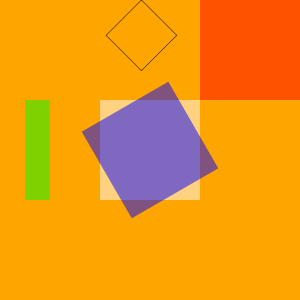

ImportError: Failed to load CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawsvg#full-feature-install for more details.

In [40]:
# Solution
import drawsvg as draw

d = draw.Drawing(300,300, origin=(0,0))
d.append(draw.Rectangle(0, 0, 300,300, fill='orange'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(255,255,255,.5)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(255,0,0,.5)',transform='translate(100,-100)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(0,255,0,.5)',transform='scale(.25,1)'))
d.append(draw.Rectangle(100, 100, 100,100,fill='rgba(0,0,255,.5)',transform_origin="150 150",transform='rotate(-30)'))
d.append(draw.Rectangle(100, 100, 100,100,stroke='black',fill='none',transform='scale(.5) rotate(-45) translate(0,100)'))
display(d)
d.save_png('transforms.png')


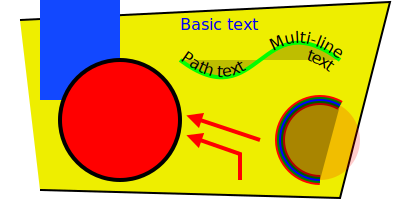

In [13]:
import drawsvg as draw

d = draw.Drawing(200, 100, origin='center')

# Draw an irregular polygon
d.append(draw.Lines(-80, 45,
                     70, 49,
                     95, -49,
                    -90, -40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80, -50, 40, 50, fill='#1248ff')
r.append_title("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, 10, 30,
        fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime', fill='black', fill_opacity=0.2)
p.M(-10, -20)  # Start path at point (-10, -20)
p.C(30, 10, 30, -50, 70, -20)  # Draw a curve to (70, -20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, -35, fill='blue'))  # 8pt text at (-10, -35)
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', line_height=1))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end', center=True))

# Draw multiple circular arcs
d.append(draw.ArcLine(60, 20, 20, 60, 270,
        stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60, 20, 20, 90, -60, cw=True,
        stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60, 20, 20, -60, 90, cw=False,
        stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.51, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, 0.5, -0.1, -0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
        marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, 40).L(20, 27).L(0, 20)  # Chain multiple path commands
d.append(p)
d.append(draw.Line(30, 20, 0, 10,
        stroke='red', stroke_width=2, fill='none',
        marker_end=arrow))  # Add an arrow to the end of a line

d.set_pixel_scale(2)  # Set number of pixels per geometry unit
#d.set_render_size(400, 200)  # Alternative to set_pixel_scale
d.save_svg('example.svg')
d.save_png('example.png')

# Display in Jupyter notebook
# d.rasterize()  # Display as PNG
display(d)

Vous allez devoir compléter des codes pour produire les drapeaux français, états-uniens et chinois.
Les instructions géométriques détaillées sont ici :

  * https://www.info.gouv.fr/marque-de-letat/les-couleurs
  * https://en.wikipedia.org/wiki/Flag_of_the_United_States#Design
  * https://en.wikipedia.org/wiki/Flag_of_China#/media/File:Flag_of_China_(construction_sheet).svg

La difficulté est progressive.

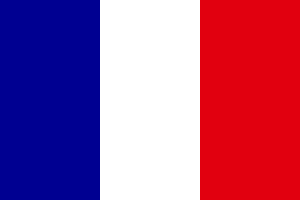

In [62]:
# Drapeau français

# Couleurs ici : https://www.info.gouv.fr/marque-de-letat/les-couleurs

import drawsvg as draw

d = draw.Drawing(300, 200, origin=(0,0))
# Votre code ici
d.append(draw.Rectangle(0, 0, 100,200,fill ='rgb(0,0,145)'))
d.append(draw.Rectangle(100, 0, 100,200,fill ='rgb(255,255,255)'))
d.append(draw.Rectangle(200, 0, 100,200,fill ='rgb(225,0,15)'))
display(d)

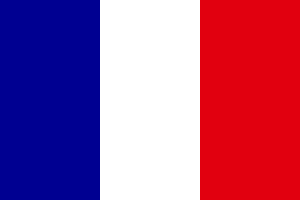

In [15]:
# Solution
toggle_button()
# Drapeau français

# Couleurs ici : https://www.info.gouv.fr/marque-de-letat/les-couleurs

import drawsvg as draw

d = draw.Drawing(300, 200, origin=(0,0))
d.append(draw.Rectangle(0,0,100,200,fill="rgb(0,0,145)"))
d.append(draw.Rectangle(100,0,100,200,fill="rgb(255,255,255)"))
d.append(draw.Rectangle(200,0,100,200,fill="rgb(225,0,15)"))

display(d)


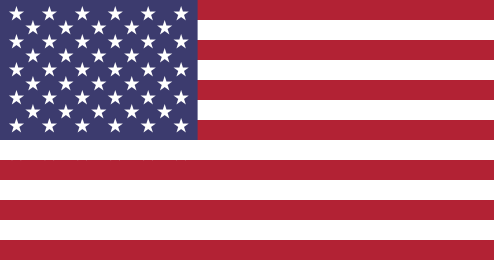

In [69]:
# Drapeau US
# https://en.wikipedia.org/wiki/Flag_of_the_United_States#Design

band=20
width,height=13*band*1.9,13*band
d = draw.Drawing(width,height, origin=(0,0))

stargroup = draw.Group(id='star', fill='white')
starheight=height*0.0308 # Une valeur ici

star = draw.Path()
sides=5
for i in range(sides):
    angle=math.radians(i*2*360/sides)
    x = starheight*math.sin(angle)
    y = -starheight*math.cos(angle)
    if i == 0:
        star.M(x,y)
    else:
        star.L(x,y)
star.Z()
stargroup.append(star)


d.append(draw.Rectangle(0,0,width,height,fill="white"))
for i in range(7):
    d.append(draw.Rectangle(0,2*band*i,width,band,fill="#B22234"))
d.append(draw.Rectangle(0,0,2/5*width,7*band,fill="#3C3B6E"))

for i in range(6):
    y = .7*band*(i*2+1)
    for j in range(6):
        x=width*.4/6*(j+.5)
        d.append(draw.Use(stargroup,x,y))
    for j in range(5):
        x=width*.4/6*(j+1)
        if i<4:
            d.append(draw.Use(stargroup,x,y+.7*band))

display(d)

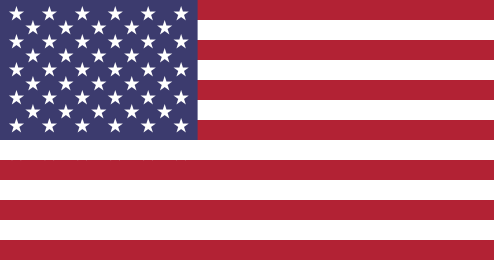

In [17]:
# Solution
toggle_button()
# Drapeau US
# https://en.wikipedia.org/wiki/Flag_of_the_United_States#Design

band=20
width,height=13*band*1.9,13*band
d = draw.Drawing(width,height, origin=(0,0))
stargroup = draw.Group(id='star', fill='white')
star = draw.Path()
starheight=height*0.0308
sides=5
for i in range(sides):
    angle=math.radians(i*2*360/sides)
    x = starheight*math.sin(angle)
    y = -starheight*math.cos(angle)
    if i == 0:
        star.M(x,y)
    else:
        star.L(x,y)
star.Z()
stargroup.append(star)

d.append(draw.Rectangle(0,0,width,height,fill="white"))
for i in range(7):
    d.append(draw.Rectangle(0,2*band*i,width,band,fill="#B22234"))
d.append(draw.Rectangle(0,0,2/5*width,7*band,fill="#3C3B6E"))

for i in range(6):
    y = .7*band*(i*2+1)
    for j in range(6):
        x=width*.4/6*(j+.5)
        d.append(draw.Use(stargroup,x,y))
    for j in range(5):
        x=width*.4/6*(j+1)
        if i<4:
            d.append(draw.Use(stargroup,x,y+.7*band))

display(d)


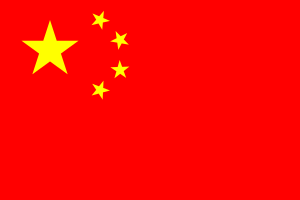

In [94]:
# Solution

# Drapeau chinois

# https://en.wikipedia.org/wiki/Flag_of_China#/media/File:Flag_of_China_(construction_sheet).svg

d = draw.Drawing(300, 200, origin=(0,0))
stargroup = draw.Group(id='star', fill='yellow')
starheight=10 # Une valeur ici

star = draw.Path()
sides = 5
starheight = 10
for i in range(sides):
    angle=math.radians(i*2*360/sides)
    x = starheight*math.sin(angle)
    y = -starheight*math.cos(angle)
    if i == 0:
        star.M(x,y)
    else:
        star.L(x,y)
star.Z()
stargroup.append(star)

d.append(draw.Rectangle(0,0,300,200,fill="rgb(255,0,0)"))
d.append(draw.Use(stargroup,50/3,50/3,transform='scale(3,3)'))
cx,cy=50,50
for delta in [(50,-30),(70,-10),(70,20),(50,40)]:
    dx,dy = delta
    angle1= 270+math.degrees(math.atan(dy/dx))
    d.append(draw.Use(stargroup,0,0,transform=f'translate({cx+dx},{cy+dy}) rotate({angle1})'))
display(d)


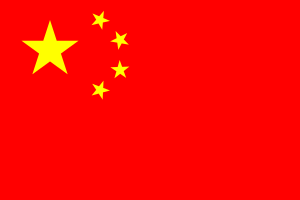

In [81]:
# Solution

# Drapeau chinois

# https://en.wikipedia.org/wiki/Flag_of_China#/media/File:Flag_of_China_(construction_sheet).svg

d = draw.Drawing(300, 200, origin=(0,0))
stargroup = draw.Group(id='star', fill='yellow')
starheight=10 # Une valeur ici

star = draw.Path()
sides = 5
starheight = 10
for i in range(sides):
    angle=math.radians(i*2*360/sides)
    x = starheight*math.sin(angle)
    y = -starheight*math.cos(angle)
    if i == 0:
        star.M(x,y)
    else:
        star.L(x,y)
star.Z()
stargroup.append(star)

d.append(draw.Rectangle(0,0,300,200,fill="rgb(255,0,0)"))
d.append(draw.Use(stargroup,50/3,50/3,transform='scale(3,3)'))
cx,cy=50,50
for delta in [(50,-30),(70,-10),(70,20),(50,40)]:
    dx,dy = delta
    angle1= 270+math.degrees(math.atan(dy/dx))
    d.append(draw.Use(stargroup,0,0,transform=f'translate({cx+dx},{cy+dy}) rotate({angle1})'))
display(d)


## Animations
Il est possible de faire des animations de plusieurs façons: dessiner des scènes qui se suivent et dont tous les mouvements sont calculés mathématiquements (passage d'une image 2D à 2D+temps) ; mais aussi en décrivant sous forme de règles d'animation des mouvements. La première possibilité ne donne pas une image SVG complètement animée, mais draw_svg peut rendre le dessin vectoriel sous forme d'images bitmap animées avec un format qui convient (PNG ou GIF).

Sinon, on rajoute des éléments d'animation avec les directives qui vont bien, comme montré dans les exemples ci-dessous.

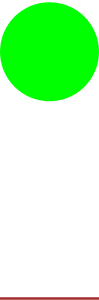

In [95]:
import drawsvg as draw

# Draw a frame of the animation
def draw_frame(t):
    d = draw.Drawing(2, 6.05, origin=(-1, -5))
    d.set_render_size(h=300)
    d.append(draw.Rectangle(-2, -6, 4, 8, fill='white'))
    d.append(draw.Rectangle(-1, 1, 2, 0.05, fill='brown'))
    t = (t + 1) % 2 - 1
    y = t**2 * 4 - 4
    d.append(draw.Circle(0, y, 1, fill='lime'))
    return d

with draw.frame_animate_jupyter(draw_frame, delay=0.05) as anim:
# Or:
#with draw.frame_animate_video('example6.gif', draw_frame, duration=0.05) as anim:
# Or:
#with draw.frame_animate_spritesheet('example6.png', draw_frame, row_length=10) as anim:
    # Add each frame to the animation
    for i in range(20):
        anim.draw_frame(i/10)
    for i in range(20):
        anim.draw_frame(i/10)
    for i in range(20):
        anim.draw_frame(i/10)

# Not a true animated SVG

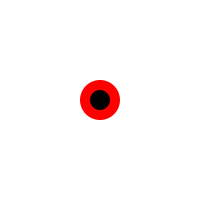

In [96]:
import drawsvg as draw

d = draw.Drawing(200, 200, origin='center')

# Animate the position and color of circle
c = draw.Circle(0, 0, 20, fill='red')
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animate
c.append_anim(draw.Animate('cy', '6s', '-80;80;-80',
                           repeatCount='indefinite'))
c.append_anim(draw.Animate('cx', '6s', '0;80;0;-80;0',
                           repeatCount='indefinite'))
c.append_anim(draw.Animate('fill', '6s', 'red;green;blue;yellow',
                           calc_mode='discrete',
                           repeatCount='indefinite'))
d.append(c)

# Animate a black circle around an ellipse
ellipse = draw.Path()
ellipse.M(-90, 0)
ellipse.A(90, 40, 360, True, True, 90, 0)  # Ellipse path
ellipse.A(90, 40, 360, True, True, -90, 0)
ellipse.Z()
c2 = draw.Circle(0, 0, 10)
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animate_motion
c2.append_anim(draw.AnimateMotion(ellipse, '3s',
                                  repeatCount='indefinite'))
# See for supported attributes:
# https://developer.mozilla.org/en-US/docs/Web/SVG/Element/animate_transform
c2.append_anim(draw.AnimateTransform('scale', '3s', '1,2;2,1;1,2;2,1;1,2',
                                     repeatCount='indefinite'))
d.append(c2)

d.save_svg('animated.svg')  # Save to file
display(d)

En utilisant un certain nombre de propriétés CSS (attention, leur nom est avec un `-` et pas un `_`), on peut faire varier beaucoup d'éléments.

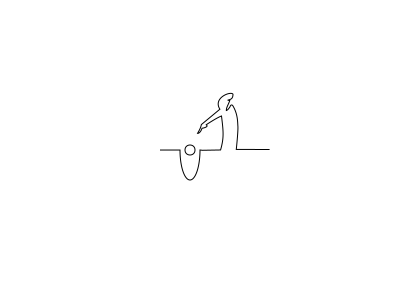

In [97]:
import drawsvg as draw

d = draw.Drawing(400,300, origin='center')
g = draw.Group(id='linea', fill='none')
p = draw.Path(stroke_width=1, stroke='black',fill='transparent',stroke_dasharray="1000")
#96.106164,170.50395
p.m(-40,0)
p.l(20,0)
p.a(10,30,0,False,False,20,0) # p.arc est beaucoup plus facile à utiliser
p.l(2.429383,0.28143)
p.l(18.152333,-0.30693)
p.c(3.49307,-12.37936,2.86094,-18.08889,0.91838,-33.97145)
p.c(-4.68294,1.70273,-15.30755,8.75733,-15.30755,8.75733)
p.c(0.46102,0.62149,1.01953,0.11307,0.67433,1.79185)
p.c(-1.3829,0.91509,-2.73356,1.43825,-4.855083,1.70044)
p.c(-0.86305,3.03193,-2.931763,5.37421,-4.477861,5.09727)
p.c(1.741505,-2.91355,3.234609,-5.63534,3.82074,-8.77076)
p.L(19.906576,-40.79305)
p.c(-7.27673,-11.33972,10.92349,-18.31349,13.06574,-15.01566)
p.c(0.0202,5.30202,-2.96965,5.23538,-5.35128,6.00817)
p.l(2.14871,0.33858)
p.c(-1.47967,4.30676,-3.44066,6.71017,-3.40504,9.97716)
p.c(1.0171,-0.2658,2.28548,-1.61054,3.68571,-3.8235)
p.c(0.80247,-2.51127,2.31847,-1.73468,2.77611,-0.94202)
p.c(5.13388,8.39004,4.77017,16.95265,5.06909,20.54731)
p.c(0.29892,3.59465,-0.9617,17.03329,-1.62619,23.13325)
p.l(33.30925,0.0662)
g.append(p)
c = draw.Circle(-10, 0, 5, stroke='black',fill='none')
c.append_anim(draw.Animate('cy','2s','25;-10;25',repeatCount='indefinite'))
c.append_anim(draw.Animate('stroke-width','2s','1;3;1',repeatCount='indefinite'))
d.append(c)
p.append_anim(draw.Animate('stroke-dasharray', '8s', '800;800', repeatCount='indefinite'))
p.append_anim(draw.Animate('stroke-dashoffset', '8s', '800;0;800', repeatCount='indefinite'))
d.append(g)
display(d)
d.save_svg('animated.svg')



**Exercice :** Reprenez un dessin que vous avez fait plus haut, et créez une animation avec. Vous pouvez aussi rajouter des éléments, comme du texte défilant ou autre.

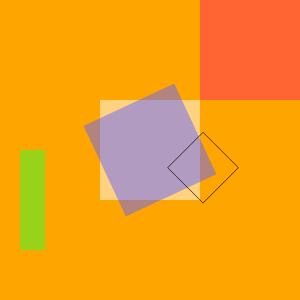

In [115]:
import drawsvg as draw
d = draw.Drawing(300,300, origin='center')
d.append(draw.Rectangle(-150, -150, 300,300, fill='orange'))
d.append(draw.Rectangle(-50, -50, 100,100,fill='rgba(255,255,255,.5)'))
d.append(draw.Rectangle(-50, -50, 100,100,fill='rgba(100,100,255,.5)',transform_origin="0 0",transform='rotate(65)'))
d.append(draw.Rectangle(0, 50, 100,100,stroke='black',fill='none',transform='scale(.5) rotate(-45)'))

lime = draw.Rectangle(-130,0,25,100,fill='rgba(50,255,50,0.5)')
lime.append_anim(draw.Animate('x','4s','-130;120;-130',repeatCount='indefinite'))
lime.append_anim(draw.Animate('fill','4s','rgba(50,255,50,0.5); rgba(255,50,255,0.5); rgba(50,255,50,0.5)',repeatCount='indefinite'))

d.append(lime)
d.append(draw.Rectangle(50,-150,100,100,fill='rgb(255,100,50)'))
display(d)

**Exercice :** Faites une page web qui incorpore : vos drapeaux, et votre animation. Vous utiliserez les méthodes suivantes :
Lien direct vers une image avec la balise img, lien direct vers une image avec la balise object, intégration directe du code svg dans la page HTML.